# Guia 3

## Ejercicio 3

Utilizando las funciones provistas por Scikit-learn, implememente los métodos de ensambles de clasificadores Bagging y AdaBoost. Compare el desempeño de estos modelos empleando 5 particiones con el conjunto de datos Wine.

- Bagging (Bootstrap Aggregating): Entrenar muchos clasificadores independientes en distintas muestras del dataset sacadas con reemplazo, y se promedian (regresión) o se toma el voto mayoritario (clasificación)

- AdaBoost (Adaptative Boosting): Entrenar varios clasificadores secuencialmente, y cada clasificador se enfoca en los errores que cometieron los anteriores. Los datos mal clasificados ponderan más para que el modelo siguiente les de mayor importancia. Se decide por voto ponderado (los clasificadores con mejor desempeño pesan más que los que tuvieron un mal desempeño)


In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import time

# dataset
wine = load_wine()
x=wine.data
y=wine.target

# clasificadores
base_clf = DecisionTreeClassifier(random_state=42)  # mismo estimador para ambos ensambles

baggin = BaggingClassifier(estimator=base_clf, n_estimators=50, random_state=42)
adaboost = AdaBoostClassifier(estimator=base_clf, n_estimators=50, random_state=42)

# KFold
def evaluar_kfold(model, x, y, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []
    cms = []
    preds = []

    t_ini = time.time()
    for fold_idx, (trn_idx, tst_idx) in enumerate(kf.split(x)):
        x_trn, x_tst = x[trn_idx], x[tst_idx]
        y_trn, y_tst = y[trn_idx], y[tst_idx]
        model.fit(x_trn, y_trn)
        y_pred = model.predict(x_tst)
        acc = accuracy_score(y_tst, y_pred)
        accuracies.append(acc)
        preds.append((y_tst,y_pred))

    t_total = time.time() - t_ini
    mean_acc = np.mean(accuracies) # Media de accuracys
    var_acc = np.var(accuracies) # Varianza de accuracys
    return accuracies, mean_acc, var_acc, preds, t_total

### Bagging

+------+----------+
| Fold | Accuracy |
+------+----------+
|  1   |  0.9722  |
|  2   |  1.0000  |
|  3   |  0.9444  |
|  4   |  0.9429  |
|  5   |  1.0000  |
+------+----------+


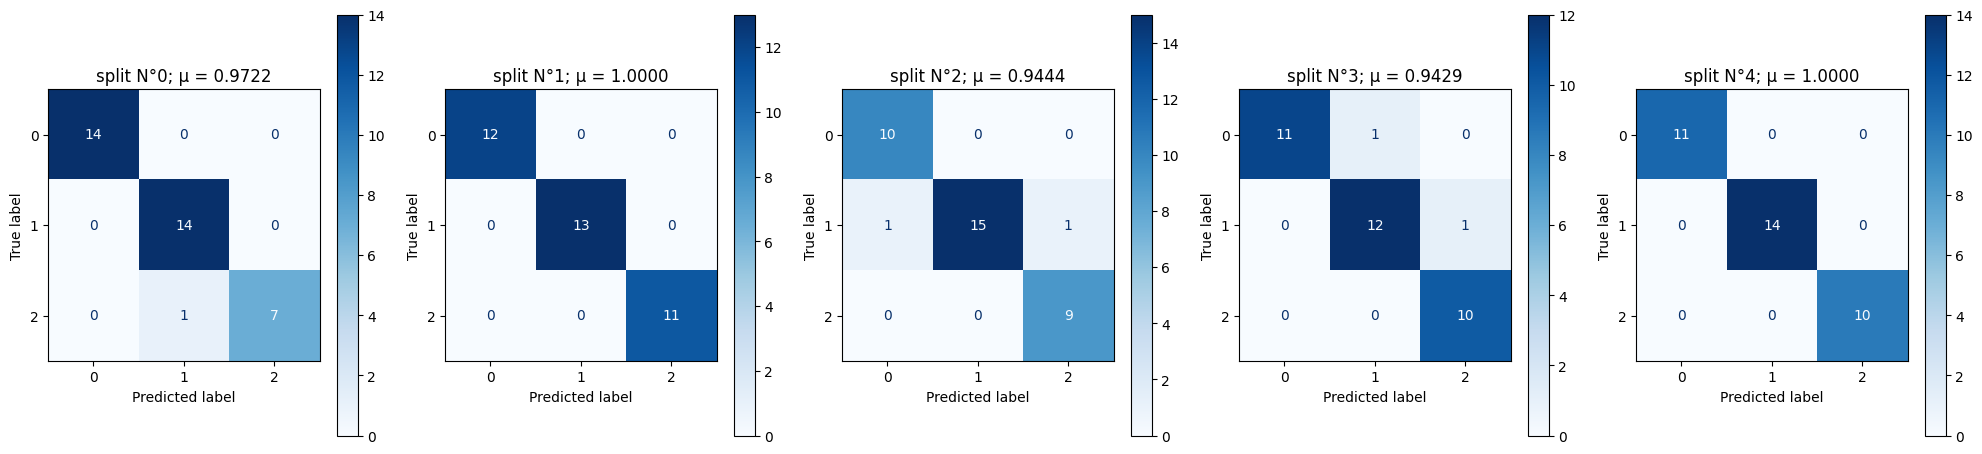

In [2]:
# Bagging
accs_bag, mean_bag, var_bag, preds_bag, t_bag = evaluar_kfold(baggin, x, y, 5)

#tabla de resultados
table_bag = PrettyTable()
table_bag.field_names = ["Fold", "Accuracy"]
for i, acc in enumerate(accs_bag):
    table_bag.add_row([i+1, f"{acc:.4f}"])
print(table_bag)

fig, ax = plt.subplots(1,5)
fig.set_figwidth(20)
fig.tight_layout()
for i in range(len(ax)):
    y_tst, y_pred = preds_bag[i]
    ax[i].set_title(f"split N°{i}; μ = {accs_bag[i]:.4f}")
    ConfusionMatrixDisplay.from_predictions(y_tst, y_pred, ax=ax[i], cmap="Blues", values_format="d")

### AdaBoost

+------+----------+
| Fold | Accuracy |
+------+----------+
|  1   |  0.9444  |
|  2   |  0.7778  |
|  3   |  0.8889  |
|  4   |  0.8571  |
|  5   |  0.9143  |
+------+----------+


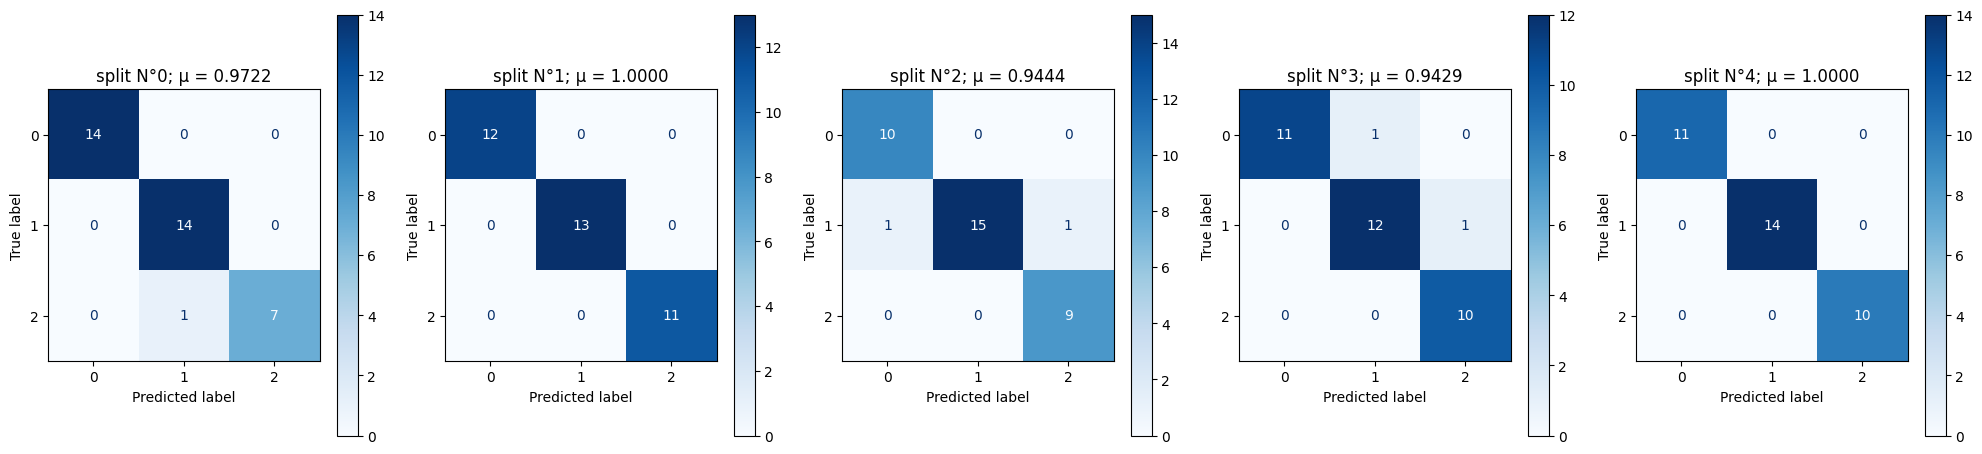

In [3]:
# AdaBoost
accs_ada, mean_ada, var_ada, preds_ada, t_ada = evaluar_kfold(adaboost, x, y, 5)

#tabla de resultados
table_ada = PrettyTable()
table_ada.field_names = ["Fold", "Accuracy"]   
for i, acc in enumerate(accs_ada):
    table_ada.add_row([i+1, f"{acc:.4f}"])
print(table_ada)

fig, ax = plt.subplots(1,5)
fig.set_figwidth(20)
fig.tight_layout()
for i in range(len(ax)):
    y_tst, y_pred = preds_bag[i]
    ax[i].set_title(f"split N°{i}; μ = {accs_bag[i]:.4f}")
    ConfusionMatrixDisplay.from_predictions(y_tst, y_pred, ax=ax[i], cmap="Blues", values_format="d")

### Comparacion

In [4]:
resumen = PrettyTable()
resumen.field_names = ["Ensamble", "μ", "σ²", "Tiempo"]
resumen.add_row(["Bagging", f"{mean_bag:.4f}", f"{var_bag:.6f}", f"{t_bag:.4f}"])
resumen.add_row(["AdaBoost", f"{mean_ada:.4f}", f"{var_ada:.6f}", f"{t_ada:.4f}"])
print(resumen)

+----------+--------+----------+--------+
| Ensamble |   μ    |    σ²    | Tiempo |
+----------+--------+----------+--------+
| Bagging  | 0.9719 | 0.000635 | 0.2894 |
| AdaBoost | 0.8765 | 0.003264 | 0.0110 |
+----------+--------+----------+--------+


### Con menos estimadores

Y agregamos otros ensambles de AdaBoost con distinta tasa de aprendizaje

In [5]:
baggin = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)
adaboost1 = AdaBoostClassifier(estimator=base_clf, learning_rate=1, n_estimators=10, random_state=42)
adaboost5 = AdaBoostClassifier(estimator=base_clf, learning_rate=5, n_estimators=10, random_state=42)
adaboost01 = AdaBoostClassifier(estimator=base_clf, learning_rate=0.1, n_estimators=10, random_state=42)

# Bagging
accs_bag, mean_bag, var_bag, preds_bag, t_bag = evaluar_kfold(baggin, x, y, 5)
# AdaBoost
accs_ada1, mean_ada1, var_ada1, preds_ada1, t_ada1 = evaluar_kfold(adaboost1, x, y, 5)
accs_ada5, mean_ada5, var_ada5, preds_ada5, t_ada5 = evaluar_kfold(adaboost1, x, y, 5)
accs_ada01, mean_ada01, var_ada01, preds_ada01, t_ada01 = evaluar_kfold(adaboost1, x, y, 5)

resumen = PrettyTable()
resumen.field_names = ["Ensamble", "μ", "σ²", "Tiempo"]
resumen.add_row(["Bagging", f"{mean_bag:.4f}", f"{var_bag:.6f}", f"{t_bag:.4f}"])
resumen.add_row(["AdaBoost (1)", f"{mean_ada1:.4f}", f"{var_ada1:.6f}", f"{t_ada1:.4f}"])
resumen.add_row(["AdaBoost (5)", f"{mean_ada5:.4f}", f"{var_ada5:.6f}", f"{t_ada5:.4f}"])
resumen.add_row(["AdaBoost (0.1)", f"{mean_ada01:.4f}", f"{var_ada01:.6f}", f"{t_ada01:.4f}"])
print(resumen)

+----------------+--------+----------+--------+
|    Ensamble    |   μ    |    σ²    | Tiempo |
+----------------+--------+----------+--------+
|    Bagging     | 0.9719 | 0.000635 | 0.0628 |
|  AdaBoost (1)  | 0.8765 | 0.003264 | 0.0087 |
|  AdaBoost (5)  | 0.8765 | 0.003264 | 0.0086 |
| AdaBoost (0.1) | 0.8765 | 0.003264 | 0.0086 |
+----------------+--------+----------+--------+


### Con mas estimadores

In [6]:
baggin = BaggingClassifier(estimator=base_clf, n_estimators=100, random_state=42)
adaboost1 = AdaBoostClassifier(estimator=base_clf, learning_rate=1, n_estimators=100, random_state=42)
adaboost5 = AdaBoostClassifier(estimator=base_clf, learning_rate=5, n_estimators=100, random_state=42)
adaboost01 = AdaBoostClassifier(estimator=base_clf, learning_rate=0.1, n_estimators=100, random_state=42)

# Bagging
accs_bag, mean_bag, var_bag, preds_bag, t_bag = evaluar_kfold(baggin, x, y, 5)
# AdaBoost
accs_ada1, mean_ada1, var_ada1, preds_ada1, t_ada1 = evaluar_kfold(adaboost1, x, y, 5)
accs_ada5, mean_ada5, var_ada5, preds_ada5, t_ada5 = evaluar_kfold(adaboost1, x, y, 5)
accs_ada01, mean_ada01, var_ada01, preds_ada01, t_ada01 = evaluar_kfold(adaboost1, x, y, 5)

resumen = PrettyTable()
resumen.field_names = ["Ensamble", "μ", "σ²", "Tiempo"]
resumen.add_row(["Bagging", f"{mean_bag:.4f}", f"{var_bag:.6f}", f"{t_bag:.4f}"])
resumen.add_row(["AdaBoost (1)", f"{mean_ada1:.4f}", f"{var_ada1:.6f}", f"{t_ada1:.4f}"])
resumen.add_row(["AdaBoost (5)", f"{mean_ada5:.4f}", f"{var_ada5:.6f}", f"{t_ada5:.4f}"])
resumen.add_row(["AdaBoost (0.1)", f"{mean_ada01:.4f}", f"{var_ada01:.6f}", f"{t_ada01:.4f}"])
print(resumen)

+----------------+--------+----------+--------+
|    Ensamble    |   μ    |    σ²    | Tiempo |
+----------------+--------+----------+--------+
|    Bagging     | 0.9719 | 0.000635 | 0.5659 |
|  AdaBoost (1)  | 0.8765 | 0.003264 | 0.0087 |
|  AdaBoost (5)  | 0.8765 | 0.003264 | 0.0086 |
| AdaBoost (0.1) | 0.8765 | 0.003264 | 0.0086 |
+----------------+--------+----------+--------+


### Con MLP

In [7]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

baggin = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)
adaboost1 = AdaBoostClassifier(estimator=base_clf, learning_rate=1, n_estimators=10, random_state=42)
adaboost5 = AdaBoostClassifier(estimator=base_clf, learning_rate=5, n_estimators=10, random_state=42)
adaboost01 = AdaBoostClassifier(estimator=base_clf, learning_rate=0.1, n_estimators=10, random_state=42)

# Bagging
accs_bag, mean_bag, var_bag, preds_bag, t_bag = evaluar_kfold(baggin, x, y, 5)
# AdaBoost
accs_ada1, mean_ada1, var_ada1, preds_ada1, t_ada1 = evaluar_kfold(adaboost1, x, y, 5)
accs_ada5, mean_ada5, var_ada5, preds_ada5, t_ada5 = evaluar_kfold(adaboost1, x, y, 5)
accs_ada01, mean_ada01, var_ada01, preds_ada01, t_ada01 = evaluar_kfold(adaboost1, x, y, 5)

resumen = PrettyTable()
resumen.field_names = ["Ensamble", "μ", "σ²", "Tiempo"]
resumen.add_row(["Bagging", f"{mean_bag:.4f}", f"{var_bag:.6f}", f"{t_bag:.4f}"])
resumen.add_row(["AdaBoost (1)", f"{mean_ada1:.4f}", f"{var_ada1:.6f}", f"{t_ada1:.4f}"])
resumen.add_row(["AdaBoost (5)", f"{mean_ada5:.4f}", f"{var_ada5:.6f}", f"{t_ada5:.4f}"])
resumen.add_row(["AdaBoost (0.1)", f"{mean_ada01:.4f}", f"{var_ada01:.6f}", f"{t_ada01:.4f}"])
print(resumen)

+----------------+--------+----------+--------+
|    Ensamble    |   μ    |    σ²    | Tiempo |
+----------------+--------+----------+--------+
|    Bagging     | 0.9719 | 0.000635 | 0.0635 |
|  AdaBoost (1)  | 0.8765 | 0.003264 | 0.0090 |
|  AdaBoost (5)  | 0.8765 | 0.003264 | 0.0089 |
| AdaBoost (0.1) | 0.8765 | 0.003264 | 0.0091 |
+----------------+--------+----------+--------+


### Conclusiones

Bagging tiene mayor media de exactitud que Adaboost (0.97 vs 0.87 respectivamente). Las varianzas en ambos casos son menores al 0.1% (los modelos son estables). 

Observando las tablas de kfold, en bagging se llega a una exactitud del 100% (accuracy=1), mientras que en adaboost no (esto se ve también en su matriz de confusión para $y_{pred} = \frac{1}{yd} = 2$ y $y_{pred} = \frac{2}{yd} = 1$)